In [17]:
from pptx import Presentation
from pptx.util import Inches
from PIL import Image

import os

In [11]:
def _add_image(slide, placeholder_id, image_url):
    placeholder = slide.placeholders[placeholder_id]
 
    # Calculate the image size of the image
    im = Image.open(image_url)
    width, height = im.size
 
    # Make sure the placeholder doesn't zoom in
    placeholder.height = height
    placeholder.width = width
 
    # Insert the picture
    placeholder = placeholder.insert_picture(image_url)
 
    # Calculate ratios and compare
    image_ratio = width / height
    placeholder_ratio = placeholder.width / placeholder.height
    ratio_difference = placeholder_ratio - image_ratio
 
    # Placeholder width too wide:
    if ratio_difference > 0:
        difference_on_each_side = ratio_difference / 2
        placeholder.crop_left = -difference_on_each_side
        placeholder.crop_right = -difference_on_each_side
    # Placeholder height too high
    else:
        difference_on_each_side = -ratio_difference / 2
        placeholder.crop_bottom = -difference_on_each_side
        placeholder.crop_top = -difference_on_each_side

In [39]:
prs = Presentation()

layout = prs.slide_layouts[8]
slide = prs.slides.add_slide(layout)
# useless
placeholder = slide.placeholders[1]
top = Inches(4)
picture = placeholder.insert_picture('hotgirl.jpg')

# title = slide.shapes.title.text = "This is Powerpoint"
# sub = slide.placeholders[2].text = "Python has the power"
# _add_image(slide,1,"hotgirl.jpg")

prs.save('testPres.pptx')
os.startfile("testPres.pptx")

In [36]:
prs = Presentation()

layout = prs.slide_layouts[8]
slide = prs.slides.add_slide(layout)

left = width = height = Inches(2)
top = Inches(4)

slide.shapes.add_textbox(left, top, width, height).text_frame.text = 'abcde'

slide.shapes.add_picture('hotgirl_1.jpg', left, top)

prs.save('testPres.pptx')
os.startfile("testPres.pptx")

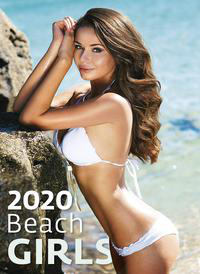

In [37]:
basewidth = 200
img = Image.open('hotgirl.jpg')
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
img.save('hotgirl_1.jpg')

Image.open('hotgirl_1.jpg')